In [4]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np
import math
import comparison as cmp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; 
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pycwt as wavelet; mother = wavelet.Morlet(6)
from scipy import stats
import read_data as rd;   import time2frequency as t2f
import behavior_track as bt ; import behavior_plot as bp ; import turning_track  as tt
import philters
import bandpower as bpr
fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;
N = int((1/fps)/T/2+1);

sgn   = ['***','**','*']
P_sgn = np.array([0.0001, 0.001, 0.05])


def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

D:\Dropbox\Lab\MotorCortex
D:\Dropbox\Lab\MotorCortex


In [5]:
mode = 'FFT'
f = np.load('Rats/freqs_'+mode+'_'+str(fs_out)+'.npy');x_fit = np.log10(f); 
T_pre = 0
idx_band = np.load('Rats/idx_band.npy')
f_band = f[idx_band]
l_fb = len(f_band)

T1 = np.load('Rats/T1.npy');
T2 = np.load('Rats/T2.npy');

t = np.arange(T_pre+T2).astype('int');
print('T1:', T1, 'T2:', T2)
idx_bt_1 = np.load('Rats/idx_bt_1.npy')
idx_bt_2 = np.load('Rats/idx_bt_2.npy')
idx_bf_b = np.load('Rats/idx_bf_b.npy')
idx_bf_l = np.load('Rats/idx_bf_l.npy')
idx_bf_h = np.load('Rats/idx_bf_h.npy')
idx_band = np.load('Rats/idx_band.npy')
f_band = f[idx_band]
f_beta_b = f_band[idx_bf_b]; f_win_b = np.hanning(len(f_beta_b))#/np.sum(f_win_l)
f_beta_l = f_band[idx_bf_l]; f_win_l = np.hanning(len(f_beta_l))#/np.sum(f_win_l)
f_beta_h = f_band[idx_bf_h]; f_win_h = np.hanning(len(f_beta_h))#/np.sum(f_win_h)

T1: 90 T2: 120


_post
Swashbuckler
post 15.0hz to 22.5 hz 0.91827 ttest_rel 19 45
post 23.75hz to 32.5 hz 0.00226 ttest_rel 32 45
post 23.75hz to 32.5 hz 0.51616 random ttest_rel 1514 3050
Outlaw
post 15.0hz to 22.5 hz 0.84886 ttest_rel 33 62
post 23.75hz to 32.5 hz 0.0001 ttest_rel 43 62
post 23.75hz to 32.5 hz 0.59759 random ttest_rel 1840 3700
Drifter
post 15.0hz to 22.5 hz 0.05374 ttest_rel 31 52
post 23.75hz to 32.5 hz 0.00486 ttest_rel 36 52
post 23.75hz to 32.5 hz 0.74481 random ttest_rel 1668 3300
Quartus
post 15.0hz to 22.5 hz 0.84907 ttest_rel 9 20
post 23.75hz to 32.5 hz 0.61966 ttest_rel 7 20
post 23.75hz to 32.5 hz 0.00136 random ttest_rel 638 1400
Lenny
post 15.0hz to 22.5 hz 0.5233 ttest_rel 15 26
post 23.75hz to 32.5 hz 0.00229 ttest_rel 18 26
post 23.75hz to 32.5 hz 0.94713 random ttest_rel 930 1900


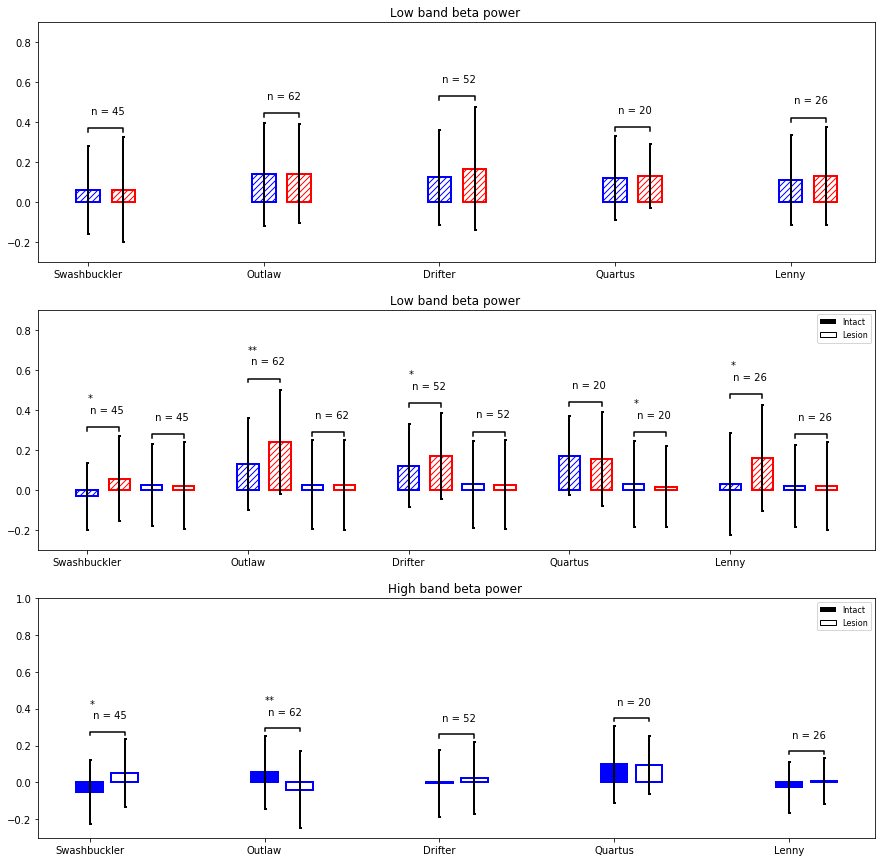

In [6]:
rats = '_post'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
# erfdn = np.load('Rats/Rats_ephy.npy')[[0,1,2,4,5,6]]
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(3, 1);
n_acc_total_x = 0
xtk    = np.arange(1, 3*n_r+1, 3)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    print(rfdn[9:len(rfdn)-1])
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    P_acc_l_T1_b_post_r = np.load(rfdn+'tracking/P_acc_l_T1_b_r'+rats+'.npy')
    P_acc_l_T2_b_post_r = np.load(rfdn+'tracking/P_acc_l_T2_b_r'+rats+'.npy')
    P_acc_i_T1_b_post_r = np.load(rfdn+'tracking/P_acc_i_T1_b_r'+rats+'.npy')
    P_acc_i_T2_b_post_r = np.load(rfdn+'tracking/P_acc_i_T2_b_r'+rats+'.npy')
    P_acc_l_T1_l_post_r = np.load(rfdn+'tracking/P_acc_l_T1_l_r'+rats+'.npy')
    P_acc_l_T2_l_post_r = np.load(rfdn+'tracking/P_acc_l_T2_l_r'+rats+'.npy')
    P_acc_i_T1_l_post_r = np.load(rfdn+'tracking/P_acc_i_T1_l_r'+rats+'.npy')
    P_acc_i_T2_l_post_r = np.load(rfdn+'tracking/P_acc_i_T2_l_r'+rats+'.npy')
    P_acc_l_T1_h_post_r = np.load(rfdn+'tracking/P_acc_l_T1_h_r'+rats+'.npy')
    P_acc_l_T2_h_post_r = np.load(rfdn+'tracking/P_acc_l_T2_h_r'+rats+'.npy')
    P_acc_i_T1_h_post_r = np.load(rfdn+'tracking/P_acc_i_T1_h_r'+rats+'.npy')
    P_acc_i_T2_h_post_r = np.load(rfdn+'tracking/P_acc_i_T2_h_r'+rats+'.npy')
    
    r_acc_i_b_post_r   = (P_acc_i_T1_b_post_r-P_acc_i_T2_b_post_r)/P_acc_i_T2_b_post_r
    r_acc_l_b_post_r   = (P_acc_l_T1_b_post_r-P_acc_l_T2_b_post_r)/P_acc_l_T2_b_post_r
    r_acc_i_b_post_r_m = np.mean(r_acc_i_b_post_r); r_acc_i_b_post_r_s = np.std(r_acc_i_b_post_r)
    r_acc_l_b_post_r_m = np.mean(r_acc_l_b_post_r); r_acc_l_b_post_r_s = np.std(r_acc_l_b_post_r)
    r_acc_i_l_post_r   = (P_acc_i_T1_l_post_r-P_acc_i_T2_l_post_r)/P_acc_i_T2_l_post_r
    r_acc_l_l_post_r   = (P_acc_l_T1_l_post_r-P_acc_l_T2_l_post_r)/P_acc_l_T2_l_post_r
    r_acc_i_l_post_r_m = np.mean(r_acc_i_l_post_r); r_acc_i_l_post_r_s = np.std(r_acc_i_l_post_r)
    r_acc_l_l_post_r_m = np.mean(r_acc_l_l_post_r); r_acc_l_l_post_r_s = np.std(r_acc_l_l_post_r)
    r_acc_i_h_post_r   = (P_acc_i_T1_h_post_r-P_acc_i_T2_h_post_r)/P_acc_i_T2_h_post_r
    r_acc_l_h_post_r   = (P_acc_l_T1_h_post_r-P_acc_l_T2_h_post_r)/P_acc_l_T2_h_post_r
    r_acc_i_h_post_r_m = np.mean(r_acc_i_h_post_r); r_acc_i_h_post_r_s = np.std(r_acc_i_h_post_r)
    r_acc_l_h_post_r_m = np.mean(r_acc_l_h_post_r); r_acc_l_h_post_r_s = np.std(r_acc_l_h_post_r)
    
    P_acc_l_T1_b_post = np.load(rfdn+'tracking/P_acc_l_T1_b'+rats+'.npy')
    P_acc_l_T2_b_post = np.load(rfdn+'tracking/P_acc_l_T2_b'+rats+'.npy')
    P_acc_i_T1_b_post = np.load(rfdn+'tracking/P_acc_i_T1_b'+rats+'.npy')
    P_acc_i_T2_b_post = np.load(rfdn+'tracking/P_acc_i_T2_b'+rats+'.npy')
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    
    r_acc_i_b_post = (P_acc_i_T1_b_post-P_acc_i_T2_b_post)/P_acc_i_T2_b_post
    r_acc_l_b_post = (P_acc_l_T1_b_post-P_acc_l_T2_b_post)/P_acc_l_T2_b_post
    r_acc_i_b_post_m = np.mean(r_acc_i_b_post); r_acc_i_b_post_s = np.std(r_acc_i_b_post)
    r_acc_l_b_post_m = np.mean(r_acc_l_b_post); r_acc_l_b_post_s = np.std(r_acc_l_b_post)
    r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)/P_acc_i_T2_l_post
    r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)/P_acc_l_T2_l_post
    r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
    r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)
    r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)/P_acc_i_T2_h_post
    r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)/P_acc_l_T2_h_post
    r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
    r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)

    
    n_acc_total = len(r_acc_i_b_post);
    ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
    t, p_l  = stats.ttest_rel(r_acc_i_b_post,   r_acc_l_b_post);
    print('post '+str(f_beta_b[0])+ 'hz to '+str(f_beta_b[-1])+' hz',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_b_post<r_acc_l_b_post), len(r_acc_i_b_post))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_b_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_b_post_m,  r_acc_i_b_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_b_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_b_post_m,  r_acc_l_b_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_b_post_m + r_acc_i_b_post_s;  
    h_i = r_acc_l_b_post_m + r_acc_l_b_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
#     t, p_l  = stats.ttest_rel(r_acc_i_b_post_r,   r_acc_l_b_post_r);
#     print('post beta random:',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_b_post_r<r_acc_l_b_post_r), len(r_acc_i_b_post_r))
#     i = 0
#     sign_l = ''
#     while i < 3:
#         if p_l<P_sgn[i]: sign_l = sgn[i]; break
#         else: i = i+1
#     ax.bar(xtk[rr]+1.2, r_acc_i_b_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
#     ax.errorbar(xtk[rr]+1.2, r_acc_i_b_post_r_m,  r_acc_i_b_post_r_s,  
#                 capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

#     ax.bar(xtk[rr]+1.8, r_acc_l_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
#     ax.errorbar(xtk[rr]+1.8, r_acc_l_b_post_r_m,  r_acc_l_b_post_r_s,  
#                 capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

#     h_l = r_acc_i_b_post_r_m + r_acc_i_b_post_r_s;  
#     h_i = r_acc_l_b_post_r_m + r_acc_l_b_post_r_s;  h = np.max([h_l,h_i])*1.05

#     ax.plot([xtk[rr]+1.2, xtk[rr]+1.2, xtk[rr]+1.8, xtk[rr]+1.8], 
#             [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
#     ax.text(xtk[rr]+1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
#     t, p_l  = stats.ttest_ind(r_acc_T2_l_post,   r_acc_T2_l_post,  equal_var=False);
#     i = 0
#     sign_l = ''
#     while i < 3:
#         if p_l<P_sgn[i]: sign_l = sgn[i]; break
#         else: i = i+1
#     h_l = r_acc_T2_l_pre_m + r_acc_T2_l_pre_s;  
#     h_i = r_acc_T2_l_pre_m + r_acc_T2_l_pre1_s;  h = np.max([h_l,h_i])*1.05

#     ax.plot([xtk[rr]+1.2, xtk[rr]+1.2, xtk[rr]+1.8, xtk[rr]+1.8], 
#             [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
#     ax.text(xtk[rr]+1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')    
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
    n_acc_total = len(r_acc_i_l_post);

    t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post);
    print('post '+str(f_beta_l[0])+ 'hz to '+str(f_beta_l[-1])+' hz',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_l_post<r_acc_l_l_post), len(r_acc_i_l_post))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
    h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
    t, p_l  = stats.ttest_rel(r_acc_i_l_post_r,   r_acc_l_l_post_r);
    print('post '+str(f_beta_l[0])+ 'hz to '+str(f_beta_l[-1])+' hz',np.round(p_l,5), 'random ttest_rel', np.sum(r_acc_i_l_post_r<r_acc_l_l_post_r), len(r_acc_i_l_post_r))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+1.2, r_acc_i_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+1.2, r_acc_i_l_post_r_m,  r_acc_i_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+1.8, r_acc_l_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+1.8, r_acc_l_l_post_r_m,  r_acc_l_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_r_m + r_acc_i_l_post_r_s;  
    h_i = r_acc_l_l_post_r_m + r_acc_l_l_post_r_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+1.2, xtk[rr]+1.2, xtk[rr]+1.8, xtk[rr]+1.8], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')    
    
    

    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);

    n_acc_total = len(r_acc_i_h_post);
    t, p_l  = stats.ttest_rel(r_acc_i_h_post,   r_acc_l_h_post); 
#     print('post high beta:',np.round(p_l,5))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_h_post_m,  r_acc_i_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_h_post_m,  r_acc_l_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_h_post_m + r_acc_i_h_post_s;  
    h_i = r_acc_l_h_post_m + r_acc_l_h_post_s;h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

    rr = rr+1
    
    
ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('Low band beta power ')

ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('Low band beta power ')


T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)

ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,1.0]);
ax.set_title('High band beta power ')

# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('Low band beta power ')

_post
Swashbuckler
post low beta: 0.00226 ttest_rel 32 45
post low beta: 0.51616 ttest_rel 1514 3050
Outlaw
post low beta: 0.0001 ttest_rel 43 62
post low beta: 0.59759 ttest_rel 1840 3700
Drifter
post low beta: 0.00486 ttest_rel 36 52
post low beta: 0.74481 ttest_rel 1668 3300
Quartus
post low beta: 0.61966 ttest_rel 7 20
post low beta: 0.00136 ttest_rel 638 1400
Lenny
post low beta: 0.00229 ttest_rel 18 26
post low beta: 0.94713 ttest_rel 930 1900


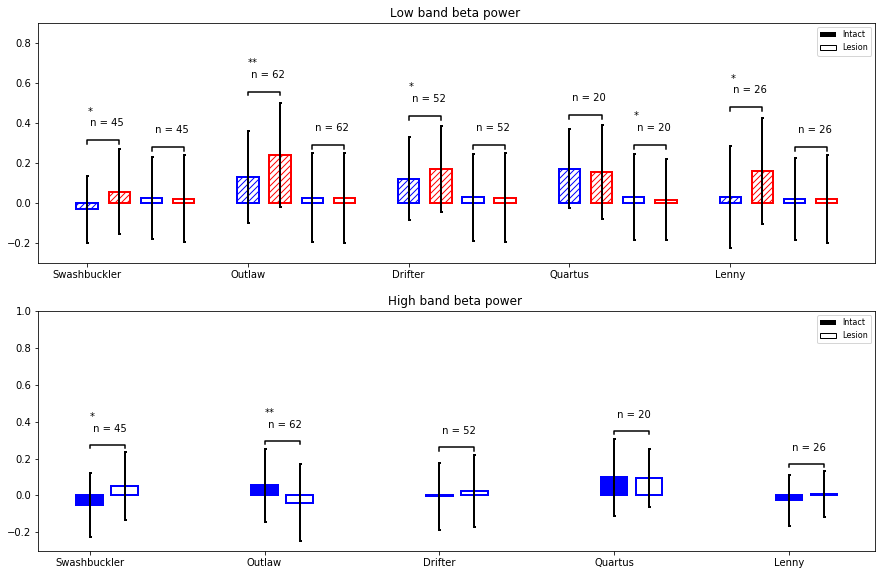

In [7]:
rats = '_post'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
# erfdn = np.load('Rats/Rats_ephy.npy')[[0,1,2,4,5,6]]
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(3, 1);
n_acc_total_x = 0
xtk    = np.arange(1, 3*n_r+1, 3)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    print(rfdn[9:len(rfdn)-1])
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);

    P_acc_l_T1_l_post_r = np.load(rfdn+'tracking/P_acc_l_T1_l_r'+rats+'.npy')
    P_acc_l_T2_l_post_r = np.load(rfdn+'tracking/P_acc_l_T2_l_r'+rats+'.npy')
    P_acc_i_T1_l_post_r = np.load(rfdn+'tracking/P_acc_i_T1_l_r'+rats+'.npy')
    P_acc_i_T2_l_post_r = np.load(rfdn+'tracking/P_acc_i_T2_l_r'+rats+'.npy')
    P_acc_l_T1_h_post_r = np.load(rfdn+'tracking/P_acc_l_T1_h_r'+rats+'.npy')
    P_acc_l_T2_h_post_r = np.load(rfdn+'tracking/P_acc_l_T2_h_r'+rats+'.npy')
    P_acc_i_T1_h_post_r = np.load(rfdn+'tracking/P_acc_i_T1_h_r'+rats+'.npy')
    P_acc_i_T2_h_post_r = np.load(rfdn+'tracking/P_acc_i_T2_h_r'+rats+'.npy')
    
    r_acc_i_l_post_r   = (P_acc_i_T1_l_post_r-P_acc_i_T2_l_post_r)/P_acc_i_T2_l_post_r
    r_acc_l_l_post_r   = (P_acc_l_T1_l_post_r-P_acc_l_T2_l_post_r)/P_acc_l_T2_l_post_r
    r_acc_i_l_post_r_m = np.mean(r_acc_i_l_post_r); r_acc_i_l_post_r_s = np.std(r_acc_i_l_post_r)
    r_acc_l_l_post_r_m = np.mean(r_acc_l_l_post_r); r_acc_l_l_post_r_s = np.std(r_acc_l_l_post_r)
    r_acc_i_h_post_r   = (P_acc_i_T1_h_post_r-P_acc_i_T2_h_post_r)/P_acc_i_T2_h_post_r
    r_acc_l_h_post_r   = (P_acc_l_T1_h_post_r-P_acc_l_T2_h_post_r)/P_acc_l_T2_h_post_r
    r_acc_i_h_post_r_m = np.mean(r_acc_i_h_post_r); r_acc_i_h_post_r_s = np.std(r_acc_i_h_post_r)
    r_acc_l_h_post_r_m = np.mean(r_acc_l_h_post_r); r_acc_l_h_post_r_s = np.std(r_acc_l_h_post_r)
    
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')

    r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)/P_acc_i_T2_l_post
    r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)/P_acc_l_T2_l_post
    r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
    r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)
    r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)/P_acc_i_T2_h_post
    r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)/P_acc_l_T2_h_post
    r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
    r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)

    
    
#     ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
    
    ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
    

    n_acc_total = len(r_acc_i_l_post);

    t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post);
    print('post low beta:',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_l_post<r_acc_l_l_post), len(r_acc_i_l_post))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
    h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
    t, p_l  = stats.ttest_rel(r_acc_i_l_post_r,   r_acc_l_l_post_r);
    print('post low beta:',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_l_post_r<r_acc_l_l_post_r), len(r_acc_i_l_post_r))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+1.2, r_acc_i_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+1.2, r_acc_i_l_post_r_m,  r_acc_i_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+1.8, r_acc_l_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+1.8, r_acc_l_l_post_r_m,  r_acc_l_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_r_m + r_acc_i_l_post_r_s;  
    h_i = r_acc_l_l_post_r_m + r_acc_l_l_post_r_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+1.2, xtk[rr]+1.2, xtk[rr]+1.8, xtk[rr]+1.8], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')    
    
    

    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);

    n_acc_total = len(r_acc_i_h_post);
    t, p_l  = stats.ttest_rel(r_acc_i_h_post,   r_acc_l_h_post); 
#     print('post high beta:',np.round(p_l,5))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_h_post_m,  r_acc_i_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_h_post_m,  r_acc_l_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_h_post_m + r_acc_i_h_post_s;  
    h_i = r_acc_l_h_post_m + r_acc_l_h_post_s;h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

    rr = rr+1
    
    

ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('Low band beta power ')


T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)

ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,1.0]);
ax.set_title('High band beta power ')

# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('Low band beta power ')

_post
Swashbuckler
post low beta: 0.00226 ttest_rel 32 45
post low beta: 0.51616 ttest_rel 1514 3050
Outlaw
post low beta: 0.0001 ttest_rel 43 62
post low beta: 0.59759 ttest_rel 1840 3700
Drifter
post low beta: 0.00486 ttest_rel 36 52
post low beta: 0.74481 ttest_rel 1668 3300
Quartus
post low beta: 0.61966 ttest_rel 7 20
post low beta: 0.00136 ttest_rel 638 1400
Lenny
post low beta: 0.00229 ttest_rel 18 26
post low beta: 0.94713 ttest_rel 930 1900


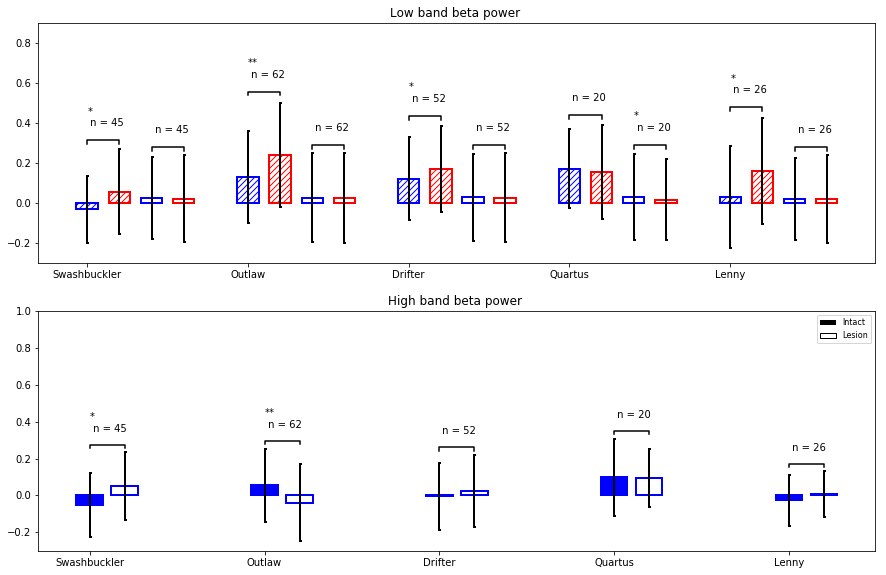

In [8]:
rats = '_post'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
# erfdn = np.load('Rats/Rats_ephy.npy')[[0,1,2,4,5,6]]
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(3, 1);
n_acc_total_x = 0
xtk    = np.arange(1, 3*n_r+1, 3)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    print(rfdn[9:len(rfdn)-1])
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);

    P_acc_l_T1_l_post_r = np.load(rfdn+'tracking/P_acc_l_T1_l_r'+rats+'.npy')
    P_acc_l_T2_l_post_r = np.load(rfdn+'tracking/P_acc_l_T2_l_r'+rats+'.npy')
    P_acc_i_T1_l_post_r = np.load(rfdn+'tracking/P_acc_i_T1_l_r'+rats+'.npy')
    P_acc_i_T2_l_post_r = np.load(rfdn+'tracking/P_acc_i_T2_l_r'+rats+'.npy')
    P_acc_l_T1_h_post_r = np.load(rfdn+'tracking/P_acc_l_T1_h_r'+rats+'.npy')
    P_acc_l_T2_h_post_r = np.load(rfdn+'tracking/P_acc_l_T2_h_r'+rats+'.npy')
    P_acc_i_T1_h_post_r = np.load(rfdn+'tracking/P_acc_i_T1_h_r'+rats+'.npy')
    P_acc_i_T2_h_post_r = np.load(rfdn+'tracking/P_acc_i_T2_h_r'+rats+'.npy')
    
    r_acc_i_l_post_r   = (P_acc_i_T1_l_post_r-P_acc_i_T2_l_post_r)/P_acc_i_T2_l_post_r
    r_acc_l_l_post_r   = (P_acc_l_T1_l_post_r-P_acc_l_T2_l_post_r)/P_acc_l_T2_l_post_r
    r_acc_i_l_post_r_m = np.mean(r_acc_i_l_post_r); r_acc_i_l_post_r_s = np.std(r_acc_i_l_post_r)
    r_acc_l_l_post_r_m = np.mean(r_acc_l_l_post_r); r_acc_l_l_post_r_s = np.std(r_acc_l_l_post_r)
    r_acc_i_h_post_r   = (P_acc_i_T1_h_post_r-P_acc_i_T2_h_post_r)/P_acc_i_T2_h_post_r
    r_acc_l_h_post_r   = (P_acc_l_T1_h_post_r-P_acc_l_T2_h_post_r)/P_acc_l_T2_h_post_r
    r_acc_i_h_post_r_m = np.mean(r_acc_i_h_post_r); r_acc_i_h_post_r_s = np.std(r_acc_i_h_post_r)
    r_acc_l_h_post_r_m = np.mean(r_acc_l_h_post_r); r_acc_l_h_post_r_s = np.std(r_acc_l_h_post_r)
    
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')

    r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)/P_acc_i_T2_l_post
    r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)/P_acc_l_T2_l_post
    r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
    r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)
    r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)/P_acc_i_T2_h_post
    r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)/P_acc_l_T2_h_post
    r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
    r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)

    
    
#     ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
    
    ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
    

    n_acc_total = len(r_acc_i_l_post);

    t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post);
    print('post low beta:',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_l_post<r_acc_l_l_post), len(r_acc_i_l_post))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_l_post_m, width = 0.4, capsize=2, lw = 2, hatch='////', facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
    h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
    t, p_l  = stats.ttest_rel(r_acc_i_l_post_r,   r_acc_l_l_post_r);
    print('post low beta:',np.round(p_l,5), 'ttest_rel', np.sum(r_acc_i_l_post_r<r_acc_l_l_post_r), len(r_acc_i_l_post_r))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+1.2, r_acc_i_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+1.2, r_acc_i_l_post_r_m,  r_acc_i_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+1.8, r_acc_l_l_post_r_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]+1.8, r_acc_l_l_post_r_m,  r_acc_l_l_post_r_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_r_m + r_acc_i_l_post_r_s;  
    h_i = r_acc_l_l_post_r_m + r_acc_l_l_post_r_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+1.2, xtk[rr]+1.2, xtk[rr]+1.8, xtk[rr]+1.8], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')    
    
    

    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);

    n_acc_total = len(r_acc_i_h_post);
    t, p_l  = stats.ttest_rel(r_acc_i_h_post,   r_acc_l_h_post); 
#     print('post high beta:',np.round(p_l,5))
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_h_post_m,  r_acc_i_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_h_post_m,  r_acc_l_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_h_post_m + r_acc_i_h_post_s;  
    h_i = r_acc_l_h_post_m + r_acc_l_h_post_s;h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

    rr = rr+1
    
    

ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('Low band beta power ')
ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,1.0]);
ax.set_title('High band beta power ')

# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('Low band beta power ')

(263,) (205,)


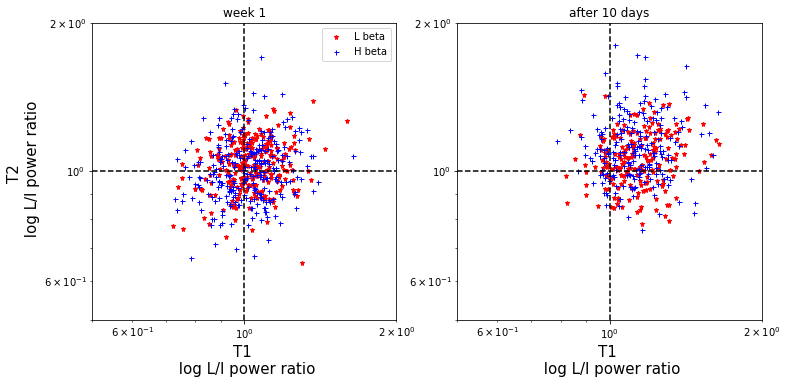

In [9]:
rats = '_pre'
P_acc_l_T1_l_pre = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_pre = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_pre = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_pre = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_pre = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_pre = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_pre = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_pre = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

rats = '_post'
P_acc_l_T1_l_post = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_post = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_post = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_post = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_post = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_post = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_post = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_post = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')
print(P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape)

r_acc_T1_l_pre = P_acc_l_T1_l_pre/P_acc_i_T1_l_pre;    
r_acc_T2_l_pre = P_acc_l_T2_l_pre/P_acc_i_T2_l_pre;

r_acc_T1_l_post = P_acc_l_T1_l_post/P_acc_i_T1_l_post;  
r_acc_T2_l_post = P_acc_l_T2_l_post/P_acc_i_T2_l_post

r_acc_T1_h_pre = P_acc_l_T1_h_pre/P_acc_i_T1_h_pre; 
r_acc_T2_h_pre = P_acc_l_T2_h_pre/P_acc_i_T2_h_pre

r_acc_T1_h_post = P_acc_l_T1_h_post/P_acc_i_T1_h_post; 
r_acc_T2_h_post = P_acc_l_T2_h_post/P_acc_i_T2_h_post

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(12); fig.set_figwidth(12)
gs  = GridSpec(2, 2);
xylim = [1/2.0,2.0]

ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
ax.loglog(r_acc_T1_l_pre,r_acc_T2_l_pre, 'r*', ms = 5, basex=10, basey=10, label = 'L beta')
ax.loglog(r_acc_T1_h_pre,r_acc_T2_h_pre, 'b+', ms = 5, basex=10, basey=10, label = 'H beta')
# ax.loglog(r_acc_T1_l_pre.mean(), r_acc_T2_l_pre.mean(), 'r*', ms = 10, basex=10, basey=10)
# ax.loglog(r_acc_T1_h_pre.mean(), r_acc_T2_h_pre.mean(), 'b+', ms = 10, basex=10, basey=10)
ax.set_xlim(xylim);ax.set_ylim(xylim);ax.set_title('week 1')
ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--');
ax.set_xlabel('T1 \n log L/I power ratio', fontsize=15);
ax.set_ylabel('T2 \n log L/I power ratio', fontsize=15);
ax.legend(fontsize = 10)
ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.loglog(r_acc_T1_l_post,r_acc_T2_l_post, 'r*', ms = 5, basex=10, basey=10)
ax.loglog(r_acc_T1_h_post,r_acc_T2_h_post, 'b+', ms = 5, basex=10, basey=10)
ax.set_xlabel('T1 \n log L/I power ratio', fontsize=15);
# ax.loglog(r_acc_T1_l_post.mean(),r_acc_T2_l_post.mean(), 'r*', ms = 10, basex=10, basey=10)
# ax.loglog(r_acc_T1_h_post.mean(),r_acc_T2_h_post.mean(), 'b+', ms = 10, basex=10, basey=10)
ax.set_xlim(xylim);ax.set_ylim(xylim);ax.set_title('after 10 days')
ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--')


(263,) (205,)
low beta: 0.372615
low beta: 0.3415
T1_l_pre vs T1_l_post: 0.030864 ind
low beta: 0.95484
low beta: 0.0
T1_l_pre vs T1_l_post: 0.010227 ind
low beta: 0.563947
low beta: 0.908853
T1_h_pre vs T1_h_post: 0.0


Text(0.5,1,'High band beta power ratio ')

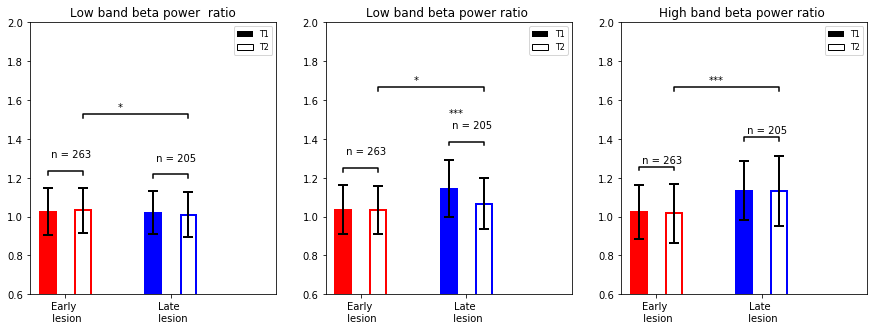

In [10]:
rats = '_pre'
P_acc_l_T1_b_pre = np.load('Rats/P_acc_l_T1_b'+rats+'.npy')
P_acc_l_T2_b_pre = np.load('Rats/P_acc_l_T2_b'+rats+'.npy')
P_acc_i_T1_b_pre = np.load('Rats/P_acc_i_T1_b'+rats+'.npy')
P_acc_i_T2_b_pre = np.load('Rats/P_acc_i_T2_b'+rats+'.npy')
P_acc_l_T1_l_pre = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_pre = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_pre = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_pre = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_pre = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_pre = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_pre = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_pre = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

rats = '_post'
P_acc_l_T1_b_post = np.load('Rats/P_acc_l_T1_b'+rats+'.npy')
P_acc_l_T2_b_post = np.load('Rats/P_acc_l_T2_b'+rats+'.npy')
P_acc_i_T1_b_post = np.load('Rats/P_acc_i_T1_b'+rats+'.npy')
P_acc_i_T2_b_post = np.load('Rats/P_acc_i_T2_b'+rats+'.npy')
P_acc_l_T1_l_post = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_post = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_post = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_post = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_post = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_post = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_post = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_post = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

print(P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape)
r_acc_T1_b_pre = P_acc_l_T1_b_pre/P_acc_i_T1_b_pre
r_acc_T2_b_pre = P_acc_l_T2_b_pre/P_acc_i_T2_b_pre

r_acc_T1_b_pre_m = np.mean(r_acc_T1_b_pre); r_acc_T1_b_pre_s = np.std(r_acc_T1_b_pre)
r_acc_T2_b_pre_m = np.mean(r_acc_T2_b_pre); r_acc_T2_b_pre_s = np.std(r_acc_T2_b_pre)

r_acc_T1_b_post = P_acc_l_T1_b_post/P_acc_i_T1_b_post;  
r_acc_T2_b_post = P_acc_l_T2_b_post/P_acc_i_T2_b_post;

r_acc_T1_b_post_m = np.mean(r_acc_T1_b_post); r_acc_T1_b_post_s = np.std(r_acc_T1_b_post)
r_acc_T2_b_post_m = np.mean(r_acc_T2_b_post); r_acc_T2_b_post_s = np.std(r_acc_T2_b_post)


r_acc_T1_l_pre = P_acc_l_T1_l_pre/P_acc_i_T1_l_pre
r_acc_T2_l_pre = P_acc_l_T2_l_pre/P_acc_i_T2_l_pre

r_acc_T1_l_pre_m = np.mean(r_acc_T1_l_pre); r_acc_T1_l_pre_s = np.std(r_acc_T1_l_pre)
r_acc_T2_l_pre_m = np.mean(r_acc_T2_l_pre); r_acc_T2_l_pre_s = np.std(r_acc_T2_l_pre)

r_acc_T1_l_post = P_acc_l_T1_l_post/P_acc_i_T1_l_post;  
r_acc_T2_l_post = P_acc_l_T2_l_post/P_acc_i_T2_l_post;

r_acc_T1_l_post_m = np.mean(r_acc_T1_l_post); r_acc_T1_l_post_s = np.std(r_acc_T1_l_post)
r_acc_T2_l_post_m = np.mean(r_acc_T2_l_post); r_acc_T2_l_post_s = np.std(r_acc_T2_l_post)


r_acc_T1_h_pre = P_acc_l_T1_h_pre/P_acc_i_T1_h_pre; 
r_acc_T2_h_pre = P_acc_l_T2_h_pre/P_acc_i_T2_h_pre;

r_acc_T1_h_pre_m = np.mean(r_acc_T1_h_pre); r_acc_T1_h_pre_s = np.std(r_acc_T1_h_pre)
r_acc_T2_h_pre_m = np.mean(r_acc_T2_h_pre); r_acc_T2_h_pre_s = np.std(r_acc_T2_h_pre)

r_acc_T1_h_post = P_acc_l_T1_h_post/P_acc_i_T1_h_post
r_acc_T2_h_post = P_acc_l_T2_h_post/P_acc_i_T2_h_post

r_acc_T1_h_post_m = np.mean(r_acc_T1_h_post); r_acc_T1_h_post_s = np.std(r_acc_T1_h_post)
r_acc_T2_h_post_m = np.mean(r_acc_T2_h_post); r_acc_T2_h_post_s = np.std(r_acc_T2_h_post)



fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(5); fig.set_figwidth(15)
gs  = GridSpec(1, 3);

xtk    = np.arange(1, 3*2+1, 3)
# xtk    = np.arange(1, 5*n_r+1, 5)
xticklabel = ['Early \n lesion', 'Late \n lesion'];
# xticklabel = np.append(xticklabel, 'L_beta ratio');




ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_T1_b_pre);
t, p_l  = stats.ttest_rel(r_acc_T1_b_pre,   r_acc_T2_b_pre); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_T1_b_pre_m, width = 0.45, capsize=3, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_b_pre_m,  r_acc_T1_b_pre_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_b_pre_m, width = 0.45, capsize=3, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_b_pre_m,  r_acc_T2_b_pre_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_b_pre_m + r_acc_T1_b_pre_s;  h_i = r_acc_T2_b_pre_m + r_acc_T2_b_pre_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

n_acc_total = len(r_acc_T1_b_post);
rr = 1
t, p_l  = stats.ttest_rel(r_acc_T1_b_post,   r_acc_T2_b_post); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_T1_b_post_m, width = 0.45, capsize=3, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_b_post_m,  r_acc_T1_b_post_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_b_post_m, width = 0.45, capsize=3, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_b_post_m,  r_acc_T2_b_post_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_b_post_m + r_acc_T1_b_post_s;  
h_i = r_acc_T2_b_post_m + r_acc_T2_b_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([0.6,2.00]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('Low band beta power  ratio')

t, p_l  = stats.ttest_ind(r_acc_T2_b_pre,   r_acc_T2_b_post,  equal_var=False);
print('T1_l_pre vs T1_l_post:',np.round(p_l,6), 'ind')
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
h_l = r_acc_T1_b_pre_m  + r_acc_T1_b_pre_s;  
h_i = r_acc_T1_b_post_m + r_acc_T1_b_post_s;  h = np.max([h_l,h_i])+0.35
ax.plot([xtk[0]+0.5, xtk[0]+0.5, xtk[1]+0.5, xtk[1]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],   'k', lw=1.5)
ax.text((xtk[0]+xtk[1])/2, h++0.05,  sign_l, color = 'k')
###############################################################################################################
###############################################################################################################
###############################################################################################################
###############################################################################################################
###############################################################################################################
###############################################################################################################
###############################################################################################################
###############################################################################################################
ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_T1_l_pre);
t, p_l  = stats.ttest_rel(r_acc_T1_l_pre,   r_acc_T2_l_pre); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_T1_l_pre_m, width = 0.45, capsize=3, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_pre_m,  yerr=r_acc_T1_l_pre_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_l_pre_m, width = 0.45, capsize=3, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_pre_m,  r_acc_T2_l_pre_s,      capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_l_pre_m + r_acc_T1_l_pre_s;  h_i = r_acc_T2_l_pre_m + r_acc_T2_l_pre_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

n_acc_total = len(r_acc_T1_l_post);
rr = 1
t, p_l  = stats.ttest_rel(r_acc_T1_l_post,   r_acc_T2_l_post); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_T1_l_post_m, width = 0.45, capsize=3, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_post_m,  r_acc_T1_l_post_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_l_post_m, width = 0.45, capsize=3, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_post_m,  r_acc_T2_l_post_s, capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_l_post_m + r_acc_T1_l_post_s;  
h_i = r_acc_T2_l_post_m + r_acc_T2_l_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([0.6,2.00]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('low '+r'$\beta$' + power  ratio')

t, p_l  = stats.ttest_ind(r_acc_T2_l_pre,   r_acc_T2_l_post,  equal_var=False);
print('T1_l_pre vs T1_l_post:',np.round(p_l,6), 'ind')
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
h_l = r_acc_T1_h_pre_m  + r_acc_T1_h_pre_s;  
h_i = r_acc_T1_h_post_m + r_acc_T1_h_post_s;  h = np.max([h_l,h_i])+0.35
ax.plot([xtk[0]+0.5, xtk[0]+0.5, xtk[1]+0.5, xtk[1]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],   'k', lw=1.5)
ax.text((xtk[0]+xtk[1])/2, h++0.05,  sign_l, color = 'k')

ax_idx = gs[0, 2]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_T1_h_pre);
t, p_l  = stats.ttest_rel(r_acc_T1_h_pre,   r_acc_T2_h_pre); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_T1_h_pre_m, width = 0.45, capsize=5, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_pre_m,  r_acc_T1_h_pre_s,  capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_h_pre_m, width = 0.45, capsize=5, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_pre_m,  r_acc_T2_h_pre_s,  capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_h_pre_m + r_acc_T1_h_pre_s;  h_i = r_acc_T2_h_pre_m + r_acc_T2_h_pre_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.05,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')


rr = 1
n_acc_total = len(r_acc_T1_h_post);
t, p_l  = stats.ttest_rel(r_acc_T1_h_post,   r_acc_T2_h_post); print('low beta:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_T1_h_post_m, width = 0.45, capsize=5, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_post_m,  r_acc_T1_h_post_s,  capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_h_post_m, width = 0.45, capsize=5, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_post_m,  r_acc_T2_h_post_s,  capsize=5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_h_post_m + r_acc_T1_h_post_s;  
h_i = r_acc_T2_h_post_m + r_acc_T2_h_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.05,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

t, p_l  = stats.ttest_ind(r_acc_T2_h_pre,   r_acc_T2_h_post,  equal_var=False); 
print('T1_h_pre vs T1_h_post:',np.round(p_l,6))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
h_l = r_acc_T1_h_pre_m  + r_acc_T1_h_pre_s;  
h_i = r_acc_T1_h_post_m + r_acc_T1_h_post_s;  h = np.max([h_l,h_i])+0.35
ax.plot([xtk[0]+0.5, xtk[0]+0.5, xtk[1]+0.5, xtk[1]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],   'k', lw=1.5)
ax.text((xtk[0]+xtk[1])/2, h+0.05,  sign_l, color = 'k')

    
ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([0.6,2.00]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('Low band beta power ratio ')
# fig.suptitle('in 2 behavioral states have difference after ', fontsize=20)


ax_idx = gs[0, 2]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([0.6,2.00]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('High band beta power ratio ')
# fig.suptitle('in 2 behavioral states have difference after ', fontsize=20)

(290,) (259,)
low beta: 0.893058848475
low beta: 1.8554e-11
low beta: 0.167340504267
low beta: 0.729882242917


Text(0.5,0.98,'Difference between Lesion and Intact')

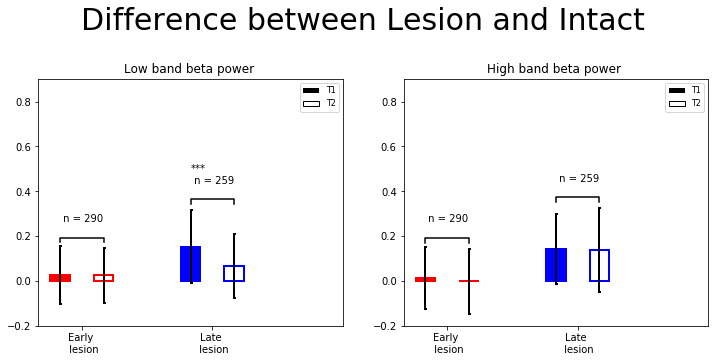

In [10]:
rats = '_pre'
P_acc_l_T1_l_pre = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_pre = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_pre = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_pre = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_pre = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_pre = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_pre = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_pre = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

rats = '_post'
P_acc_l_T1_l_post = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_post = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_post = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_post = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_post = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_post = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_post = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_post = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')
print(P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape)

r_acc_T1_l_pre = P_acc_l_T1_l_pre-P_acc_i_T1_l_pre
r_acc_T2_l_pre = P_acc_l_T2_l_pre-P_acc_i_T2_l_pre
# r_acc_T1_l_pre = P_acc_l_T1_l_pre-P_acc_i_T1_l_pre
# r_acc_T2_l_pre = P_acc_l_T2_l_pre-P_acc_i_T2_l_pre
r_acc_T1_l_pre_m = np.mean(r_acc_T1_l_pre); r_acc_T1_l_pre_s = np.std(r_acc_T1_l_pre)
r_acc_T2_l_pre_m = np.mean(r_acc_T2_l_pre); r_acc_T2_l_pre_s = np.std(r_acc_T2_l_pre)

r_acc_T1_l_post = P_acc_l_T1_l_post-P_acc_i_T1_l_post
r_acc_T2_l_post = P_acc_l_T2_l_post-P_acc_i_T2_l_post
# r_acc_T1_l_post = P_acc_l_T1_l_post-P_acc_i_T1_l_post
# r_acc_T2_l_post = P_acc_l_T2_l_post-P_acc_i_T2_l_post
r_acc_T1_l_post_m = np.mean(r_acc_T1_l_post); r_acc_T1_l_post_s = np.std(r_acc_T1_l_post)
r_acc_T2_l_post_m = np.mean(r_acc_T2_l_post); r_acc_T2_l_post_s = np.std(r_acc_T2_l_post)

r_acc_T1_h_pre = P_acc_l_T1_h_pre-P_acc_i_T1_h_pre
r_acc_T2_h_pre = P_acc_l_T2_h_pre-P_acc_i_T2_h_pre
# r_acc_T1_h_pre = P_acc_l_T1_h_pre-P_acc_i_T1_h_pre
# r_acc_T2_h_pre = P_acc_l_T2_h_pre-P_acc_i_T2_h_pre
r_acc_T1_h_pre_m = np.mean(r_acc_T1_h_pre); r_acc_T1_h_pre_s = np.std(r_acc_T1_h_pre)
r_acc_T2_h_pre_m = np.mean(r_acc_T2_h_pre); r_acc_T2_h_pre_s = np.std(r_acc_T2_h_pre)

r_acc_T1_h_post = P_acc_l_T1_h_post-P_acc_i_T1_h_post
r_acc_T2_h_post = P_acc_l_T2_h_post-P_acc_i_T2_h_post
# r_acc_T1_h_post = P_acc_l_T1_h_post-P_acc_i_T1_h_post
# r_acc_T2_h_post = P_acc_l_T2_h_post-P_acc_i_T2_h_post
r_acc_T1_h_post_m = np.mean(r_acc_T1_h_post); r_acc_T1_h_post_s = np.std(r_acc_T1_h_post)
r_acc_T2_h_post_m = np.mean(r_acc_T2_h_post); r_acc_T2_h_post_s = np.std(r_acc_T2_h_post)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(10); fig.set_figwidth(12)
gs  = GridSpec(2, 2);

xtk    = np.arange(1, 3*2+1, 3)
# xtk    = np.arange(1, 5*n_r+1, 5)
xticklabel = ['Early \n lesion', 'Late \n lesion'];
# xticklabel = np.append(xticklabel, 'L_beta ratio');

ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_T1_l_pre);
t, p_l  = stats.ttest_rel(r_acc_T1_l_pre,   r_acc_T2_l_pre); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_T1_l_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_pre_m,  r_acc_T1_l_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_l_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_pre_m,  r_acc_T2_l_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_l_pre_m + r_acc_T1_l_pre_s;  h_i = r_acc_T2_l_pre_m + r_acc_T2_l_pre_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

n_acc_total = len(r_acc_T1_l_post);
rr = 1
t, p_l  = stats.ttest_rel(r_acc_T1_l_post,   r_acc_T2_l_post); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_T1_l_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_post_m,  r_acc_T1_l_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_l_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_post_m,  r_acc_T2_l_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_l_post_m + r_acc_T1_l_post_s;  
h_i = r_acc_T2_l_post_m + r_acc_T2_l_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.2,0.9]);
ax.set_xlim([0 , 7]);
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('Low band beta power ')

ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_T1_h_pre);
t, p_l  = stats.ttest_rel(r_acc_T1_h_pre,   r_acc_T2_h_pre); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_T1_h_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_pre_m,  r_acc_T1_h_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_h_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_pre_m,  r_acc_T2_h_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_h_pre_m + r_acc_T1_h_pre_s;  h_i = r_acc_T2_h_pre_m + r_acc_T2_h_pre_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')


rr = 1
n_acc_total = len(r_acc_T1_h_post);
t, p_l  = stats.ttest_rel(r_acc_T1_h_post,   r_acc_T2_h_post); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_T1_h_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_post_m,  r_acc_T1_h_post_s,   capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_T2_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_post_m,  r_acc_T2_h_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_T1_h_post_m + r_acc_T1_h_post_s;  
h_i = r_acc_T2_h_post_m + r_acc_T2_h_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.2,0.9]);
ax.set_xlim([0 , 7]);
T1_patch  = Patch(facecolor='k',   label='T1')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('High band beta power ')
fig.suptitle('Difference between Lesion and Intact', fontsize=30)

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXX

(290,) (259,)
low beta: 0.81021510559
low beta: 5.0961556e-08
low beta: 0.14610338404 0.05 0.1
low beta: 0.701549233156


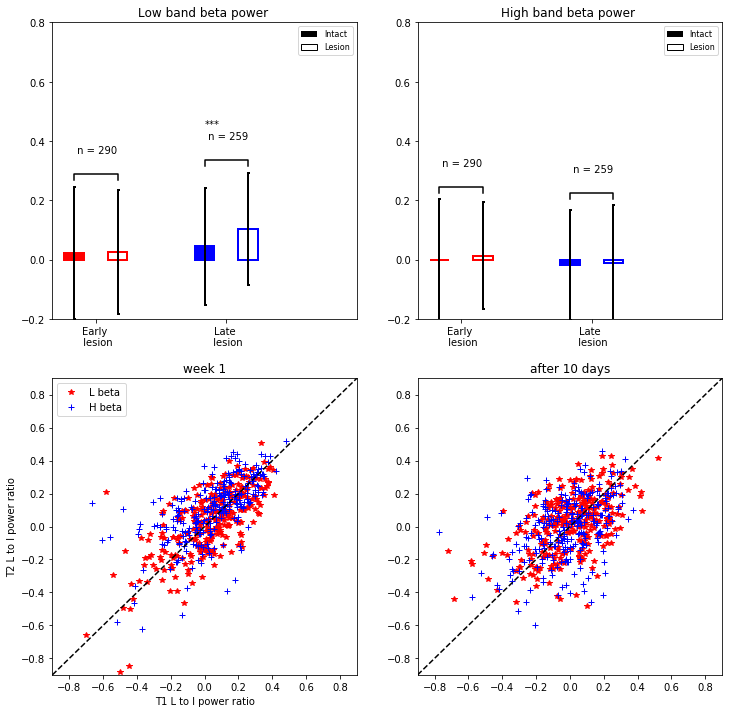

In [11]:
rats = '_pre'
P_acc_l_T1_l_pre = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_pre = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_pre = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_pre = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_pre = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_pre = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_pre = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_pre = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

rats = '_post'
P_acc_l_T1_l_post = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
P_acc_l_T2_l_post = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
P_acc_i_T1_l_post = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
P_acc_i_T2_l_post = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
P_acc_l_T1_h_post = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
P_acc_l_T2_h_post = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
P_acc_i_T1_h_post = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
P_acc_i_T2_h_post = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')
print(P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape)

r_acc_i_l_pre   = (P_acc_i_T1_l_pre-P_acc_i_T2_l_pre)/P_acc_i_T1_l_pre
r_acc_l_l_pre   = (P_acc_l_T1_l_pre-P_acc_l_T2_l_pre)/P_acc_l_T1_l_pre

r_acc_i_l_pre_m = np.mean(r_acc_i_l_pre); r_acc_i_l_pre_s = np.std(r_acc_i_l_pre)
r_acc_l_l_pre_m = np.mean(r_acc_l_l_pre); r_acc_l_l_pre_s = np.std(r_acc_l_l_pre)

r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)/P_acc_i_T1_l_post
r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)/P_acc_l_T1_l_post

r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)

r_acc_i_h_pre   = (P_acc_i_T1_h_pre-P_acc_i_T2_h_pre)/P_acc_i_T1_h_pre
r_acc_l_h_pre   = (P_acc_l_T1_h_pre-P_acc_l_T2_h_pre)/P_acc_l_T1_h_pre

r_acc_i_h_pre_m = np.mean(r_acc_i_h_pre); r_acc_i_h_pre_s = np.std(r_acc_i_h_pre)
r_acc_l_h_pre_m = np.mean(r_acc_l_h_pre); r_acc_l_h_pre_s = np.std(r_acc_l_h_pre)

r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)/P_acc_i_T1_h_post
r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)/P_acc_l_T1_h_post

r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(12); fig.set_figwidth(12)
gs  = GridSpec(2, 2);

xtk    = np.arange(1, 3*2+1, 3)
# xtk    = np.arange(1, 5*n_r+1, 5)
xticklabel = ['Early \n lesion', 'Late \n lesion'];
# xticklabel = np.append(xticklabel, 'L_beta ratio');

ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_i_l_pre);
t, p_l  = stats.ttest_rel(r_acc_i_l_pre,   r_acc_l_l_pre); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_i_l_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_i_l_pre_m,  r_acc_i_l_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_l_l_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_l_l_pre_m,  r_acc_l_l_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_i_l_pre_m + r_acc_i_l_pre_s;  
h_i = r_acc_l_l_pre_m + r_acc_l_l_pre_s;  h = np.max([h_l,h_i])*1.05


ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

n_acc_total = len(r_acc_i_l_post);
rr = 1
t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_i_l_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_l_l_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    

ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.2,0.8]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('Low band beta power ')
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
rr = 0
n_acc_total = len(r_acc_i_h_pre);
t, p_l  = stats.ttest_rel(r_acc_i_h_pre,   r_acc_l_h_pre);
print('low beta:',np.round(p_l,15),np.round(r_acc_i_l_post_m,2), np.round(r_acc_l_l_post_m,2))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1

ax.bar(xtk[rr]-0.5, r_acc_i_h_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
ax.errorbar(xtk[rr]-0.5, r_acc_i_h_pre_m,  r_acc_i_h_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_l_h_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
ax.errorbar(xtk[rr]+0.5, r_acc_l_h_pre_m,  r_acc_l_h_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_i_h_pre_m + r_acc_i_h_pre_s;  
h_i = r_acc_l_h_pre_m + r_acc_l_h_pre_s;  h = np.max([h_l,h_i])*1.05


ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

n_acc_total = len(r_acc_i_h_post);
rr = 1
t, p_l  = stats.ttest_rel(r_acc_i_h_post,   r_acc_l_h_post); print('low beta:',np.round(p_l,15))
i = 0
sign_l = ''
while i < 3:
    if p_l<P_sgn[i]: sign_l = sgn[i]; break
    else: i = i+1
ax.bar(xtk[rr]-0.5, r_acc_i_h_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
ax.errorbar(xtk[rr]-0.5, r_acc_i_h_post_m,  r_acc_i_h_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

ax.bar(xtk[rr]+0.5, r_acc_l_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
ax.errorbar(xtk[rr]+0.5, r_acc_l_h_post_m,  r_acc_l_h_post_s,  
            capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

h_l = r_acc_i_h_post_m + r_acc_i_h_post_s;  
h_i = r_acc_l_h_post_m + r_acc_l_h_post_s;h = np.max([h_l,h_i])*1.05

ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
        [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.2,0.8]);
ax.set_xlim([0 , 7]);
# ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
ax.set_title('High band beta power ')

xylim = [-0.9,0.9]
ax_idx = gs[1, 0]; ax = fig.add_subplot(ax_idx);
ax.plot(r_acc_i_l_pre,r_acc_l_l_pre,   'r*', label = 'L beta')
ax.plot(r_acc_i_l_post,r_acc_l_l_post, 'b+',label = 'H beta')

ax.set_xlim(xylim);ax.set_ylim(xylim);ax.set_title('week 1')
ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--');
ax.plot(xylim,xylim,'k--')
ax.set_xlabel('T1 L to I power ratio');
ax.set_ylabel('T2 L to I power ratio');
ax.legend(fontsize = 10)
ax_idx = gs[1, 1]; ax = fig.add_subplot(ax_idx);
ax.plot(r_acc_i_h_pre, r_acc_l_h_pre,  'r*')
ax.plot(r_acc_i_h_post,r_acc_l_h_post, 'b+')
ax.set_xlim(xylim);ax.set_ylim(xylim);ax.set_title('after 10 days')
ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--')
ax.plot(xylim,xylim,'k--')

In [12]:
# rats = '_pre'
# P_acc_l_T1_l_pre = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
# P_acc_l_T2_l_pre = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
# P_acc_i_T1_l_pre = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
# P_acc_i_T2_l_pre = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
# P_acc_l_T1_h_pre = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
# P_acc_l_T2_h_pre = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
# P_acc_i_T1_h_pre = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
# P_acc_i_T2_h_pre = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')

# rats = '_post'
# P_acc_l_T1_l_post = np.load('Rats/P_acc_l_T1_l'+rats+'.npy')
# P_acc_l_T2_l_post = np.load('Rats/P_acc_l_T2_l'+rats+'.npy')
# P_acc_i_T1_l_post = np.load('Rats/P_acc_i_T1_l'+rats+'.npy')
# P_acc_i_T2_l_post = np.load('Rats/P_acc_i_T2_l'+rats+'.npy')
# P_acc_l_T1_h_post = np.load('Rats/P_acc_l_T1_h'+rats+'.npy')
# P_acc_l_T2_h_post = np.load('Rats/P_acc_l_T2_h'+rats+'.npy')
# P_acc_i_T1_h_post = np.load('Rats/P_acc_i_T1_h'+rats+'.npy')
# P_acc_i_T2_h_post = np.load('Rats/P_acc_i_T2_h'+rats+'.npy')
# print(P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape)

# r_acc_T1_l_pre = P_acc_l_T1_l_pre/P_acc_i_T1_l_pre
# r_acc_T2_l_pre = P_acc_l_T2_l_pre/P_acc_i_T2_l_pre
# # r_acc_T1_l_pre = P_acc_l_T1_l_pre-P_acc_i_T1_l_pre
# # r_acc_T2_l_pre = P_acc_l_T2_l_pre-P_acc_i_T2_l_pre
# r_acc_T1_l_pre_m = np.mean(r_acc_T1_l_pre); r_acc_T1_l_pre_s = np.std(r_acc_T1_l_pre)
# r_acc_T2_l_pre_m = np.mean(r_acc_T2_l_pre); r_acc_T2_l_pre_s = np.std(r_acc_T2_l_pre)

# r_acc_T1_l_post = P_acc_l_T1_l_post/P_acc_i_T1_l_post
# r_acc_T2_l_post = P_acc_l_T2_l_post/P_acc_i_T2_l_post
# # r_acc_T1_l_post = P_acc_l_T1_l_post-P_acc_i_T1_l_post
# # r_acc_T2_l_post = P_acc_l_T2_l_post-P_acc_i_T2_l_post
# r_acc_T1_l_post_m = np.mean(r_acc_T1_l_post); r_acc_T1_l_post_s = np.std(r_acc_T1_l_post)
# r_acc_T2_l_post_m = np.mean(r_acc_T2_l_post); r_acc_T2_l_post_s = np.std(r_acc_T2_l_post)

# r_acc_T1_h_pre = P_acc_l_T1_h_pre/P_acc_i_T1_h_pre
# r_acc_T2_h_pre = P_acc_l_T2_h_pre/P_acc_i_T2_h_pre
# # r_acc_T1_h_pre = P_acc_l_T1_h_pre-P_acc_i_T1_h_pre
# # r_acc_T2_h_pre = P_acc_l_T2_h_pre-P_acc_i_T2_h_pre
# r_acc_T1_h_pre_m = np.mean(r_acc_T1_h_pre); r_acc_T1_h_pre_s = np.std(r_acc_T1_h_pre)
# r_acc_T2_h_pre_m = np.mean(r_acc_T2_h_pre); r_acc_T2_h_pre_s = np.std(r_acc_T2_h_pre)

# r_acc_T1_h_post = P_acc_l_T1_h_post/P_acc_i_T1_h_post
# r_acc_T2_h_post = P_acc_l_T2_h_post/P_acc_i_T2_h_post
# # r_acc_T1_h_post = P_acc_l_T1_h_post-P_acc_i_T1_h_post
# # r_acc_T2_h_post = P_acc_l_T2_h_post-P_acc_i_T2_h_post
# r_acc_T1_h_post_m = np.mean(r_acc_T1_h_post); r_acc_T1_h_post_s = np.std(r_acc_T1_h_post)
# r_acc_T2_h_post_m = np.mean(r_acc_T2_h_post); r_acc_T2_h_post_s = np.std(r_acc_T2_h_post)

# fig = plt.figure(1, figsize=(1, 1))
# fig.set_figheight(10); fig.set_figwidth(12)
# gs  = GridSpec(2, 2);

# xtk    = np.arange(1, 3*2+1, 3)
# # xtk    = np.arange(1, 5*n_r+1, 5)
# xticklabel = ['Early \n lesion', 'Late \n lesion'];
# # xticklabel = np.append(xticklabel, 'L_beta ratio');

# ax_idx = gs[0, 0]; ax = fig.add_subplot(ax_idx);
# rr = 0
# n_acc_total = len(r_acc_T1_l_pre);
# t, p_l  = stats.ttest_rel(r_acc_T1_l_pre,   r_acc_T2_l_pre); print('low beta:',np.round(p_l,15))
# i = 0
# sign_l = ''
# while i < 3:
#     if p_l<P_sgn[i]: sign_l = sgn[i]; break
#     else: i = i+1

# ax.bar(xtk[rr]-0.5, r_acc_T1_l_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
# ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_pre_m,  r_acc_T1_l_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# ax.bar(xtk[rr]+0.5, r_acc_T2_l_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
# ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_pre_m,  r_acc_T2_l_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# h_l = r_acc_T1_l_pre_m + r_acc_T1_l_pre_s;  h_i = r_acc_T2_l_pre_m + r_acc_T2_l_pre_s;  h = np.max([h_l,h_i])*1.05

# ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
#         [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
# ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

# n_acc_total = len(r_acc_T1_l_post);
# rr = 1
# t, p_l  = stats.ttest_rel(r_acc_T1_l_post,   r_acc_T2_l_post); print('low beta:',np.round(p_l,15))
# i = 0
# sign_l = ''
# while i < 3:
#     if p_l<P_sgn[i]: sign_l = sgn[i]; break
#     else: i = i+1
# ax.bar(xtk[rr]-0.5, r_acc_T1_l_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
# ax.errorbar(xtk[rr]-0.5, r_acc_T1_l_post_m,  r_acc_T1_l_post_s,  
#             capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# ax.bar(xtk[rr]+0.5, r_acc_T2_l_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
# ax.errorbar(xtk[rr]+0.5, r_acc_T2_l_post_m,  r_acc_T2_l_post_s,  
#             capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# h_l = r_acc_T1_l_post_m + r_acc_T1_l_post_s;  
# h_i = r_acc_T2_l_post_m + r_acc_T2_l_post_s;  h = np.max([h_l,h_i])*1.05

# ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
#         [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
# ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# # ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
# ax.set_xticklabels(xticklabel, fontsize=10);  
# ax.set_xticks(xtk); 
# ax.set_ylim([0.7,1.5]);
# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
# T1_patch  = Patch(facecolor='k',   label='T1')
# T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # # T2_patch  = patch(facecolor='blue',    label='T2')
# # # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
# ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('Low band beta power ')

# ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
# rr = 0
# n_acc_total = len(r_acc_T1_h_pre);
# t, p_l  = stats.ttest_rel(r_acc_T1_h_pre,   r_acc_T2_h_pre); print('low beta:',np.round(p_l,15))
# i = 0
# sign_l = ''
# while i < 3:
#     if p_l<P_sgn[i]: sign_l = sgn[i]; break
#     else: i = i+1

# ax.bar(xtk[rr]-0.5, r_acc_T1_h_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
# ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_pre_m,  r_acc_T1_h_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# ax.bar(xtk[rr]+0.5, r_acc_T2_h_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
# ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_pre_m,  r_acc_T2_h_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# h_l = r_acc_T1_h_pre_m + r_acc_T1_h_pre_s;  h_i = r_acc_T2_h_pre_m + r_acc_T2_h_pre_s;  h = np.max([h_l,h_i])*1.05

# ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
#         [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
# ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')


# rr = 1
# n_acc_total = len(r_acc_T1_h_post);
# t, p_l  = stats.ttest_rel(r_acc_T1_h_post,   r_acc_T2_h_post); print('low beta:',np.round(p_l,15))
# i = 0
# sign_l = ''
# while i < 3:
#     if p_l<P_sgn[i]: sign_l = sgn[i]; break
#     else: i = i+1
# ax.bar(xtk[rr]-0.5, r_acc_T1_h_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
# ax.errorbar(xtk[rr]-0.5, r_acc_T1_h_post_m,  r_acc_T1_h_post_s,   capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# ax.bar(xtk[rr]+0.5, r_acc_T2_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
# ax.errorbar(xtk[rr]+0.5, r_acc_T2_h_post_m,  r_acc_T2_h_post_s,  
#             capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

# h_l = r_acc_T1_h_post_m + r_acc_T1_h_post_s;  
# h_i = r_acc_T2_h_post_m + r_acc_T2_h_post_s;  h = np.max([h_l,h_i])*1.05

# ax.plot([xtk[rr]-0.5, xtk[rr]-0.5, xtk[rr]+0.5, xtk[rr]+0.5], 
#         [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
# ax.text(xtk[rr]-0.5, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
# # ax_idx = gs[0, 1]; ax = fig.add_subplot(ax_idx);
# ax.set_xticklabels(xticklabel, fontsize=10);  
# ax.set_xticks(xtk); 
# ax.set_ylim([0.7,2.0]);
# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
# T1_patch  = Patch(facecolor='k',   label='T1')
# T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='T2')
# # # T2_patch  = patch(facecolor='blue',    label='T2')
# # # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
# ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('High band beta power ')

_both
Drifter
['myAnimal20190403_150444' 'myAnimal20190404_145335']
Quartus
['myAnimal20190211_134124' 'myAnimal20190211_134835']


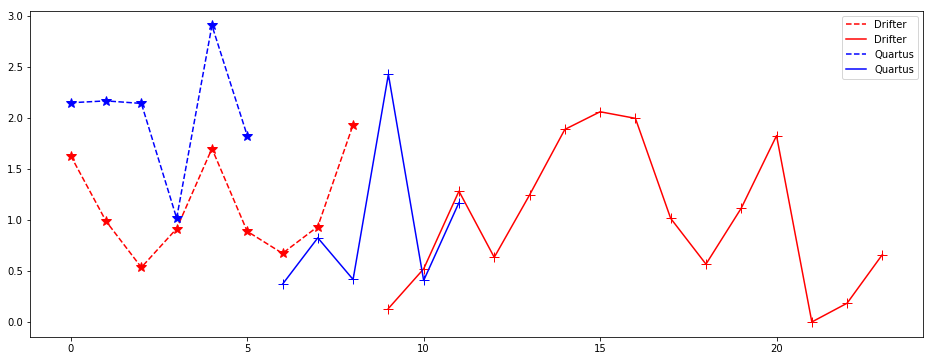

In [13]:
rats = '_both'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[2,3]];
clr = ['r','b','g','k','orange','pink','purple']
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(6); fig.set_figwidth(16)
gs  = GridSpec(1, 1);
ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
n_acc_total_x = 0
xtk    = np.arange(1, 4*n_r+1, 4)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    print(rfdn[9:len(rfdn)-1])
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    
    
    rats = '_pre'
    r_ac_pre = np.load(rfdn+'tracking/r_ac'+rats+'.npy')
    T_k_pre = np.load(rfdn+'tracking/T_k'+rats+'.npy')
    r_ac_pre_m, r_ac_pre_s = weighted_avg_and_std(r_ac_pre, T_k_pre)

    
    rats = '_post'
    epn   = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    r_ac_post = np.load(rfdn+'tracking/r_ac'+rats+'.npy')
    T_k_post = np.load(rfdn+'tracking/T_k'+rats+'.npy')
    print(epn[[0,1]])
    r_ac_post_m, r_ac_post_s = weighted_avg_and_std(r_ac_post, T_k_post)
    
    
    x_pre = np.arange(len(r_ac_pre))
    ax.plot(x_pre, r_ac_pre, '*',  color = clr[rr], ms=10);
    ax.plot(x_pre, r_ac_pre, '--', color = clr[rr], label = rfdn[9:len(rfdn)-1]);
    
    x_post = np.arange(len(r_ac_pre), len(r_ac_pre)+len(r_ac_post))
    ax.plot(x_post, r_ac_post, '+', color = clr[rr], ms=10);
    ax.plot(x_post, r_ac_post, '-', color = clr[rr], label = rfdn[9:len(rfdn)-1]);
    
    rr = rr+1
    
    
ax.legend()

_both
Swashbuckler (49,) (49,) (56,) (56,)
distance: 0.0024 ttest_rel
Outlaw (59,) (59,) (74,) (74,)
distance: 1e-05 ttest_rel
Drifter (83,) (83,) (62,) (62,)
distance: 0.25528 ttest_rel
Quartus (65,) (65,) (30,) (30,)
distance: 0.04198 ttest_rel
Lenny (34,) (34,) (37,) (37,)
distance: 0.00146 ttest_rel


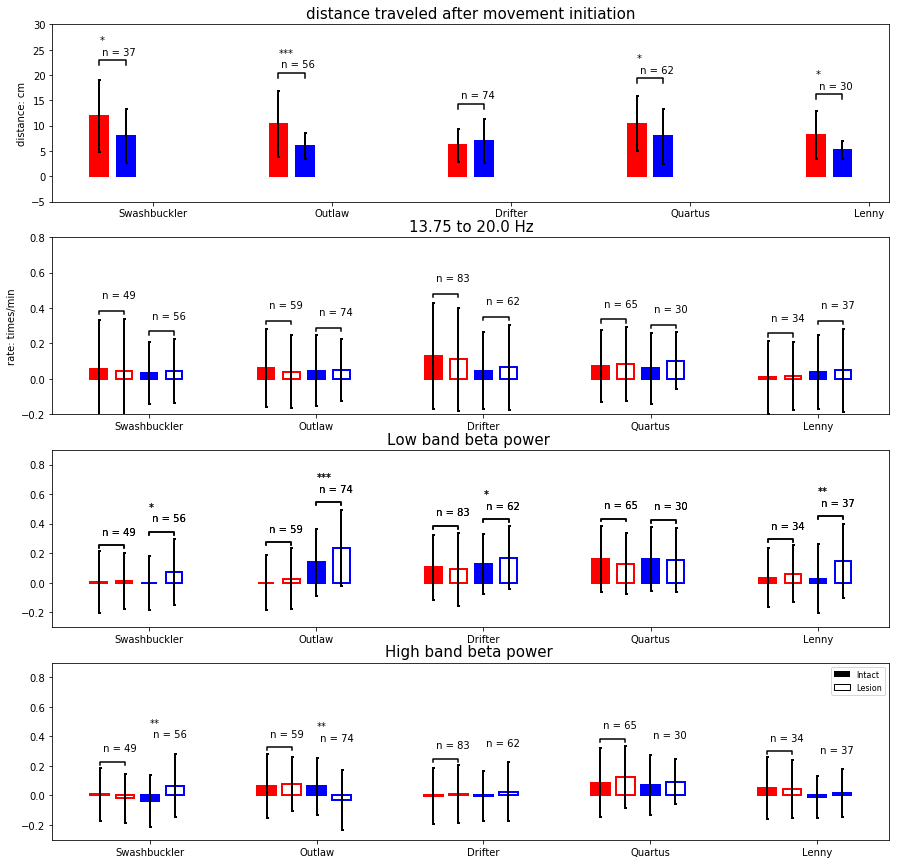

In [22]:
rats = '_both'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(4, 1);
n_acc_total_x = 0
xtk    = np.arange(1, 4*n_r+1, 4)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    
    
    rats = '_pre'
    P_acc_l_T1_b_pre = np.load(rfdn+'tracking/P_acc_l_T1_b'+rats+'.npy')
    P_acc_l_T2_b_pre = np.load(rfdn+'tracking/P_acc_l_T2_b'+rats+'.npy')
    P_acc_i_T1_b_pre = np.load(rfdn+'tracking/P_acc_i_T1_b'+rats+'.npy')
    P_acc_i_T2_b_pre = np.load(rfdn+'tracking/P_acc_i_T2_b'+rats+'.npy')
    P_acc_l_T1_l_pre = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_pre = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_pre = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_pre = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_pre = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_pre = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_pre = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_pre = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    dis_ac_pre   = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    dis_ac_pre_m = np.mean(dis_ac_pre); dis_ac_pre_s = np.std(dis_ac_pre);
    
    r_acc_i_b_pre   = (P_acc_i_T1_b_pre-P_acc_i_T2_b_pre)/P_acc_i_T2_b_pre
    r_acc_l_b_pre   = (P_acc_l_T1_b_pre-P_acc_l_T2_b_pre)/P_acc_l_T2_b_pre
    r_acc_i_b_pre_m = np.mean(r_acc_i_b_pre); r_acc_i_b_pre_s = np.std(r_acc_i_b_pre)
    r_acc_l_b_pre_m = np.mean(r_acc_l_b_pre); r_acc_l_b_pre_s = np.std(r_acc_l_b_pre)
    r_acc_i_l_pre   = (P_acc_i_T1_l_pre-P_acc_i_T2_l_pre)/P_acc_i_T2_l_pre
    r_acc_l_l_pre   = (P_acc_l_T1_l_pre-P_acc_l_T2_l_pre)/P_acc_l_T2_l_pre
    r_acc_i_l_pre_m = np.mean(r_acc_i_l_pre); r_acc_i_l_pre_s = np.std(r_acc_i_l_pre)
    r_acc_l_l_pre_m = np.mean(r_acc_l_l_pre); r_acc_l_l_pre_s = np.std(r_acc_l_l_pre)
    r_acc_i_h_pre   = (P_acc_i_T1_h_pre-P_acc_i_T2_h_pre)/P_acc_i_T2_h_pre
    r_acc_l_h_pre   = (P_acc_l_T1_h_pre-P_acc_l_T2_h_pre)/P_acc_l_T2_h_pre
    r_acc_i_h_pre_m = np.mean(r_acc_i_h_pre); r_acc_i_h_pre_s = np.std(r_acc_i_h_pre)
    r_acc_l_h_pre_m = np.mean(r_acc_l_h_pre); r_acc_l_h_pre_s = np.std(r_acc_l_h_pre)
    
    rats = '_post'
    P_acc_l_T1_b_post = np.load(rfdn+'tracking/P_acc_l_T1_b'+rats+'.npy')
    P_acc_l_T2_b_post = np.load(rfdn+'tracking/P_acc_l_T2_b'+rats+'.npy')
    P_acc_i_T1_b_post = np.load(rfdn+'tracking/P_acc_i_T1_b'+rats+'.npy')
    P_acc_i_T2_b_post = np.load(rfdn+'tracking/P_acc_i_T2_b'+rats+'.npy')
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    dis_ac_post = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    dis_ac_post_m = np.mean(dis_ac_post); dis_ac_post_s = np.std(dis_ac_post);

    r_acc_i_b_post = (P_acc_i_T1_b_post-P_acc_i_T2_b_post)/P_acc_i_T2_l_post
    r_acc_l_b_post = (P_acc_l_T1_b_post-P_acc_l_T2_b_post)/P_acc_l_T2_l_post
    r_acc_i_b_post_m = np.mean(r_acc_i_b_post); r_acc_i_b_post_s = np.std(r_acc_i_b_post)
    r_acc_l_b_post_m = np.mean(r_acc_l_b_post); r_acc_l_b_post_s = np.std(r_acc_l_b_post)
    r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)/P_acc_i_T2_l_post
    r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)/P_acc_l_T2_l_post
    r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
    r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)
    r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)/P_acc_i_T2_h_post
    r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)/P_acc_l_T2_h_post
    r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
    r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)
    
    print(rfdn[9:len(rfdn)-1], P_acc_i_T2_h_pre.shape, dis_ac_pre.shape, P_acc_i_T2_h_post.shape, dis_ac_post.shape)
    
    ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
    t, p_l  = stats.ttest_ind(dis_ac_pre,   dis_ac_post,  equal_var=False);
    print('distance:',np.round(p_l,5), 'ttest_rel')
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax.bar(xtk[rr]-1.2, dis_ac_pre_m, width = 0.4, capsize=2, lw = 2, color='red', edgecolor = 'red')
#     ax.plot((xtk[rr]-1.2)*np.ones((len(dis_ac_pre),)),dis_ac_pre, 'x')
    ax.errorbar(xtk[rr]-1.2, dis_ac_pre_m,  dis_ac_pre_s, capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]-0.6, dis_ac_post_m, width = 0.4, capsize=2, lw = 2, facecolor='blue', edgecolor = 'blue')
#     ax.plot((xtk[rr]-0.6)*np.ones((len(dis_ac_post),)),dis_ac_post, 'x')
    ax.errorbar(xtk[rr]-0.6, dis_ac_post_m,  dis_ac_post_s, capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = dis_ac_post_m + dis_ac_post_s;  
    h_i = dis_ac_pre_m  + dis_ac_pre_s;  h = np.max([h_l,h_i])*1.1

    ax.plot([xtk[rr]-1.2, xtk[rr]-1.2, xtk[rr]-0.6, xtk[rr]-0.6], 
            [h+1, h+2, h+2, h+1],              'k', lw=1.5)
    ax.text(xtk[rr]-1.2, h+3,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')
    
    
    ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
    n_acc_total = len(r_acc_i_l_pre);
    t, p_l  = stats.ttest_rel(r_acc_i_l_pre,   r_acc_l_l_pre); 
#     print('pre low beta:',np.round(p_l,5), 'ttest_rel')
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax.bar(xtk[rr]-1.2, r_acc_i_l_pre_m, width = 0.4, capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-1.2, r_acc_i_l_pre_m,  r_acc_i_l_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]-0.6, r_acc_l_l_pre_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.6, r_acc_l_l_pre_m,  r_acc_l_l_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_pre_m + r_acc_i_l_pre_s;  
    h_i = r_acc_l_l_pre_m + r_acc_l_l_pre_s;  h = np.max([h_l,h_i])*1.05


    ax.plot([xtk[rr]-1.2, xtk[rr]-1.2, xtk[rr]-0.6, xtk[rr]-0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

    n_acc_total = len(r_acc_i_l_post);

    t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post);
    stat, p = stats.wilcoxon(r_acc_i_l_post, r_acc_l_l_post)

#     print('post low beta:',np.round(p_l,5), 'ttest_rel', np.round(p,5), 'wilcoxon', 
#           np.sum(r_acc_i_l_post<r_acc_l_l_post), len(r_acc_i_l_post),
#          )
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_l_post_m, width = 0.4, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_l_post_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
    h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    
    
    
    ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
    n_acc_total = len(r_acc_i_b_pre);
    t, p_l  = stats.ttest_rel(r_acc_i_b_pre,   r_acc_l_b_pre); 
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax.bar(xtk[rr]-1.2, r_acc_i_b_pre_m, width = 0.4, capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-1.2, r_acc_i_b_pre_m,  r_acc_i_b_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]-0.6, r_acc_l_b_pre_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.6, r_acc_l_b_pre_m,  r_acc_l_b_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_b_pre_m + r_acc_i_b_pre_s;  
    h_i = r_acc_l_b_pre_m + r_acc_l_b_pre_s;  h = np.max([h_l,h_i])*1.05


    ax.plot([xtk[rr]-1.2, xtk[rr]-1.2, xtk[rr]-0.6, xtk[rr]-0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

    n_acc_total = len(r_acc_i_b_post);

    t, p_l  = stats.ttest_rel(r_acc_i_b_post, r_acc_l_b_post)
    stat, p = stats.wilcoxon (r_acc_i_b_post, r_acc_l_b_post)
    
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_b_post_m, width = 0.4, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_b_post_m,  r_acc_i_b_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_b_post_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_b_post_m,  r_acc_l_b_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_b_post_m + r_acc_i_b_post_s;  
    h_i = r_acc_l_b_post_m + r_acc_l_b_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')
    
    ############################################################################
    ############################################################################
    ############################################################################
    ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
    n_acc_total = len(r_acc_i_l_pre);
    t, p_l  = stats.ttest_rel(r_acc_i_l_pre,   r_acc_l_l_pre); 
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax.bar(xtk[rr]-1.2, r_acc_i_l_pre_m, width = 0.4, capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-1.2, r_acc_i_l_pre_m,  r_acc_i_l_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]-0.6, r_acc_l_l_pre_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.6, r_acc_l_l_pre_m,  r_acc_l_l_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_pre_m + r_acc_i_l_pre_s;  
    h_i = r_acc_l_l_pre_m + r_acc_l_l_pre_s;  h = np.max([h_l,h_i])*1.05


    ax.plot([xtk[rr]-1.2, xtk[rr]-1.2, xtk[rr]-0.6, xtk[rr]-0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

    n_acc_total = len(r_acc_i_l_post);

    t, p_l  = stats.ttest_rel(r_acc_i_l_post,   r_acc_l_l_post);
    stat, p = stats.wilcoxon(r_acc_i_l_post, r_acc_l_l_post)

#     print('post low beta:',np.round(p_l,5), 'ttest_rel', np.round(p,5), 'wilcoxon', 
#           np.sum(r_acc_i_l_post<r_acc_l_l_post), len(r_acc_i_l_post),
#          )
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_l_post_m, width = 0.4, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_l_post_m,  r_acc_i_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_l_post_m, width = 0.4, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_l_post_m,  r_acc_l_l_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_l_post_m + r_acc_i_l_post_s;  
    h_i = r_acc_l_l_post_m + r_acc_l_l_post_s;  h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')



    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    #####################################################################################################################
    ax_idx = gs[3]; ax = fig.add_subplot(ax_idx);
    n_acc_total = len(r_acc_i_h_pre);
    t, p_l  = stats.ttest_rel(r_acc_i_h_pre,   r_acc_l_h_pre);
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1

    ax.bar(xtk[rr]-1.2, r_acc_i_h_pre_m, width = 0.45, capsize=2, lw = 2, color='red', edgecolor = 'red')
    ax.errorbar(xtk[rr]-1.2, r_acc_i_h_pre_m,  r_acc_i_h_pre_s,capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]-0.6, r_acc_l_h_pre_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'red')
    ax.errorbar(xtk[rr]-0.6, r_acc_l_h_pre_m,  r_acc_l_h_pre_s,  capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_h_pre_m + r_acc_i_h_pre_s;  
    h_i = r_acc_l_h_pre_m + r_acc_l_h_pre_s;  h = np.max([h_l,h_i])*1.05


    ax.plot([xtk[rr]-1.2, xtk[rr]-1.2, xtk[rr]-0.6, xtk[rr]-0.6], 
            [h+0.01, h+0.03, h+0.03, h+0.01],              'k', lw=1.5)
    ax.text(xtk[rr]-1.2, h+0.1,  sign_l+'\n n = '+str(n_acc_total), fontsize=10, color = 'k')

    n_acc_total = len(r_acc_i_h_post);
    t, p_l  = stats.ttest_rel(r_acc_i_h_post,   r_acc_l_h_post); 
    i = 0
    sign_l = ''
    while i < 3:
        if p_l<P_sgn[i]: sign_l = sgn[i]; break
        else: i = i+1
    ax.bar(xtk[rr]+0.0, r_acc_i_h_post_m, width = 0.45, capsize=2, lw = 2, color='blue', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.0, r_acc_i_h_post_m,  r_acc_i_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    ax.bar(xtk[rr]+0.6, r_acc_l_h_post_m, width = 0.45, capsize=2, lw = 2, facecolor='white', edgecolor = 'blue')
    ax.errorbar(xtk[rr]+0.6, r_acc_l_h_post_m,  r_acc_l_h_post_s,  
                capsize=1.5, elinewidth=2, markeredgewidth=2, color = 'k')

    h_l = r_acc_i_h_post_m + r_acc_i_h_post_s;  
    h_i = r_acc_l_h_post_m + r_acc_l_h_post_s;h = np.max([h_l,h_i])*1.05

    ax.plot([xtk[rr]+0.0, xtk[rr]+0.0, xtk[rr]+0.6, xtk[rr]+0.6], 
            [h+1, h+3, h+3, h+1],              'k', lw=1.5)
    ax.text(xtk[rr]+0.0, h+0.1,  sign_l+'\n n = '+str(n_acc_total), color = 'k')

    rr = rr+1
    
ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
ax.set_ylim([-5, 30]);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk);
ax.set_ylabel('distance: cm')
ax.set_title('distance traveled after movement initiation', fontsize=15)


ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
ax.set_ylim([-0.2, 0.8]);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk);
ax.set_ylabel('rate: times/min')
ax.set_title(str(f_beta_b[0])+' to '+str(f_beta_b[-1])+' Hz', fontsize=15)


ax_idx = gs[2]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('Low band beta power ', fontsize=15)
ax_idx = gs[3]; ax = fig.add_subplot(ax_idx);
ax.set_xticklabels(xticklabel, fontsize=10);  
ax.set_xticks(xtk); 
ax.set_ylim([-0.3,0.9]);
ax.set_title('High band beta power ', fontsize=15)

# ax.set_xlim([0 , 7]);
# # ax.plot([xtk[0],xtk[-1]], [1,1], '--')
T1_patch  = Patch(facecolor='k',   label='Intact')
T2_patch  = Patch(facecolor='white', edgecolor = 'k', label='Lesion')
# # T2_patch  = patch(facecolor='blue',    label='T2')
# # T3_patch  = patch(facecolor='white', hatch = '////', edgecolor = 'red', label='T3')
ax.legend(handles=[T1_patch, T2_patch], loc='upper right', fontsize=8)
# ax.set_title('Low band beta power ')

_both
Swashbuckler (49,) (49,) (56,) (56,)
Outlaw (59,) (59,) (74,) (74,)
Drifter (83,) (83,) (62,) (62,)
Quartus (65,) (65,) (30,) (30,)
Lenny (34,) (34,) (37,) (37,)


IndexError: invalid index

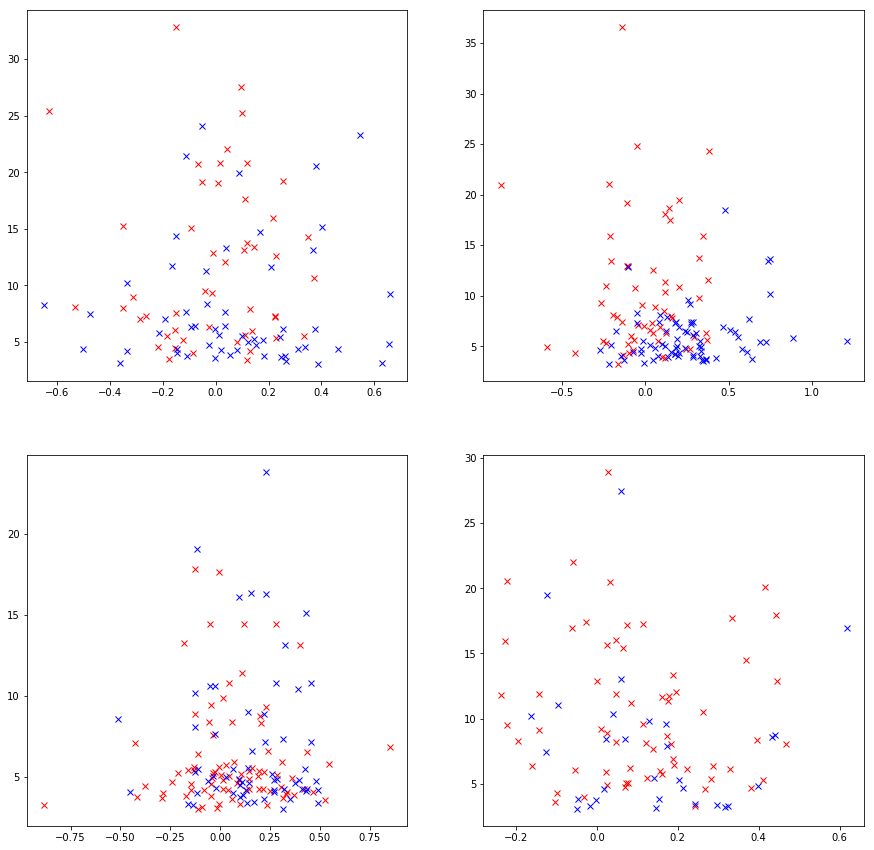

In [15]:
rats = '_both'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
n_r = len(erfdn)
P_acc_l_T1_l_a = np.empty((0,)); P_acc_l_T2_l_a = np.empty((0,))
P_acc_i_T1_l_a = np.empty((0,)); P_acc_i_T2_l_a = np.empty((0,))
P_acc_l_T1_h_a = np.empty((0,)); P_acc_l_T2_h_a = np.empty((0,))
P_acc_i_T1_h_a = np.empty((0,)); P_acc_i_T2_h_a = np.empty((0,))
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(2, 2);
n_acc_total_x = 0
xtk    = np.arange(1, 4*n_r+1, 4)
xticklabel = [];
rr = 0

for rfdn in erfdn:
    
    xticklabel = np.append(xticklabel, rfdn[9:len(rfdn)-1]);
    
    
    rats = '_pre'
    P_acc_l_T1_l_pre = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_pre = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_pre = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_pre = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_pre = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_pre = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_pre = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_pre = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    dis_ac_pre   = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    dis_ac_pre_m = np.mean(dis_ac_pre); dis_ac_pre_s = np.std(dis_ac_pre);

    r_acc_i_l_pre   = (P_acc_i_T1_l_pre-P_acc_i_T2_l_pre)#/P_acc_i_T1_l_pre
    r_acc_l_l_pre   = (P_acc_l_T1_l_pre-P_acc_l_T2_l_pre)#/P_acc_l_T1_l_pre
    r_acc_i_l_pre_m = np.mean(r_acc_i_l_pre); r_acc_i_l_pre_s = np.std(r_acc_i_l_pre)
    r_acc_l_l_pre_m = np.mean(r_acc_l_l_pre); r_acc_l_l_pre_s = np.std(r_acc_l_l_pre)
    r_acc_i_h_pre   = (P_acc_i_T1_h_pre-P_acc_i_T2_h_pre)#/P_acc_i_T1_h_pre
    r_acc_l_h_pre   = (P_acc_l_T1_h_pre-P_acc_l_T2_h_pre)
    r_acc_i_h_pre_m = np.mean(r_acc_i_h_pre); r_acc_i_h_pre_s = np.std(r_acc_i_h_pre)
    r_acc_l_h_pre_m = np.mean(r_acc_l_h_pre); r_acc_l_h_pre_s = np.std(r_acc_l_h_pre)
    

    rats = '_post'
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    dis_ac_post = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    dis_ac_post_m = np.mean(dis_ac_post); dis_ac_post_s = np.std(dis_ac_post);

    r_acc_i_l_post = (P_acc_i_T1_l_post-P_acc_i_T2_l_post)#/P_acc_i_T1_l_post
    r_acc_l_l_post = (P_acc_l_T1_l_post-P_acc_l_T2_l_post)#/P_acc_l_T1_l_post
    r_acc_i_l_post_m = np.mean(r_acc_i_l_post); r_acc_i_l_post_s = np.std(r_acc_i_l_post)
    r_acc_l_l_post_m = np.mean(r_acc_l_l_post); r_acc_l_l_post_s = np.std(r_acc_l_l_post)
    r_acc_i_h_post = (P_acc_i_T1_h_post-P_acc_i_T2_h_post)#/P_acc_i_T1_h_post
    r_acc_l_h_post = (P_acc_l_T1_h_post-P_acc_l_T2_h_post)#/P_acc_l_T1_h_post
    r_acc_i_h_post_m = np.mean(r_acc_i_h_post); r_acc_i_h_post_s = np.std(r_acc_i_h_post)
    r_acc_l_h_post_m = np.mean(r_acc_l_h_post); r_acc_l_h_post_s = np.std(r_acc_l_h_post)
    
    print(rfdn[9:len(rfdn)-1], P_acc_i_T2_h_pre.shape, dis_ac_pre.shape, P_acc_i_T2_h_post.shape, dis_ac_post.shape)
    ax_idx = gs[rr];   ax = fig.add_subplot(ax_idx);
    ax.plot(r_acc_l_l_pre,  dis_ac_pre,  'xr')
    ax.plot(r_acc_l_l_post, dis_ac_post, 'xb')
#     ax_idx = gs[rr+1]; ax = fig.add_subplot(ax_idx);
    rr = rr+1
    


Swashbuckler (48,) (52,)
Swashbuckler 0.95806
Outlaw (58,) (73,)
Outlaw 0.95806
Drifter (78,) (60,)
Drifter 0.95806
Quartus (64,) (29,)
Quartus 0.95806
Lenny (34,) (36,)
Lenny 0.95806


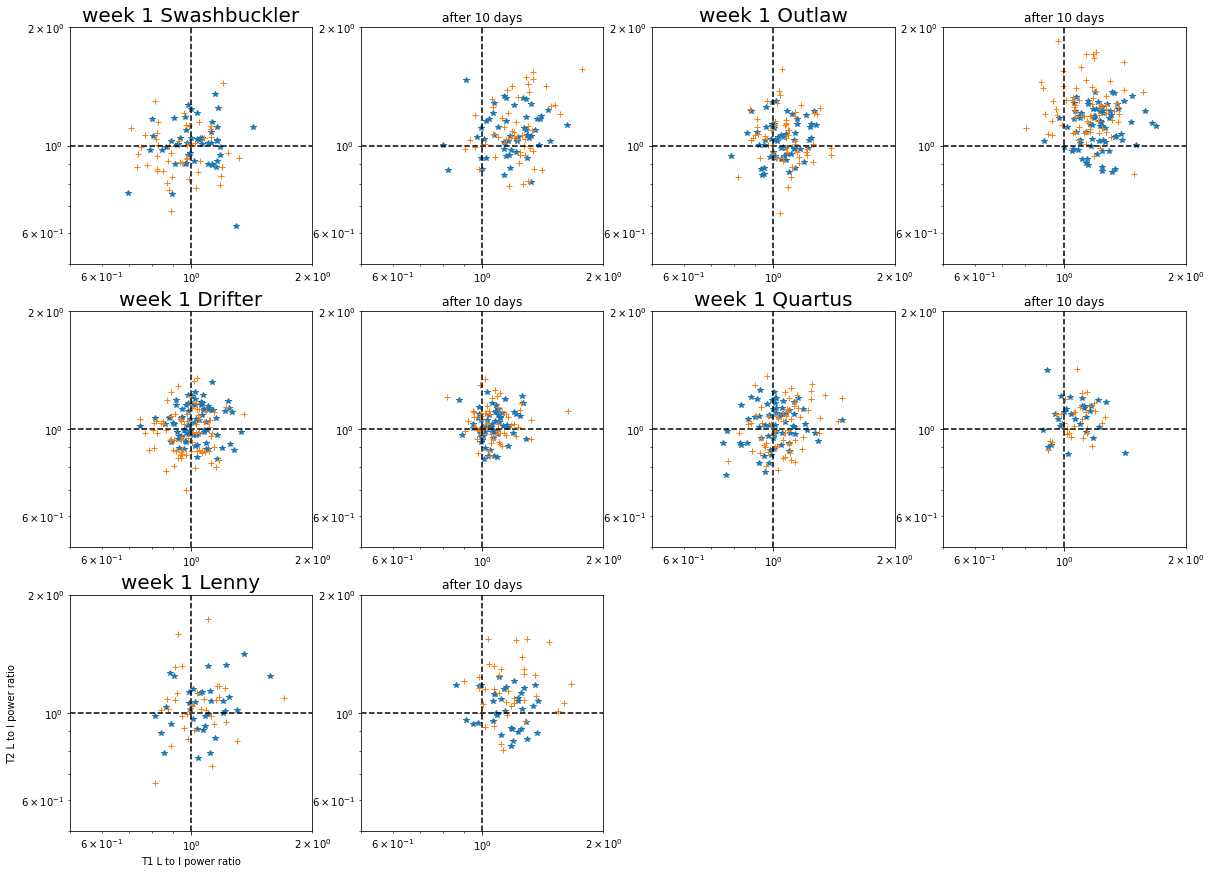

In [13]:
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(20); fig.set_figwidth(20)
gs  = GridSpec(4, 4);
rr = 0

for rfdn in erfdn:
    rats = '_pre'
    P_acc_l_T1_l_pre = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_pre = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_pre = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_pre = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_pre = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_pre = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_pre = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_pre = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')

    rats = '_post'
    P_acc_l_T1_l_post = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l_post = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l_post = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l_post = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h_post = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h_post = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h_post = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h_post = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    
    

    
    r_acc_T1_l_pre = P_acc_l_T1_l_pre/P_acc_i_T1_l_pre;    
    r_acc_T2_l_pre = P_acc_l_T2_l_pre/P_acc_i_T2_l_pre;

    r_acc_T1_l_post = P_acc_l_T1_l_post/P_acc_i_T1_l_post;  
    r_acc_T2_l_post = P_acc_l_T2_l_post/P_acc_i_T2_l_post

    r_acc_T1_h_pre = P_acc_l_T1_h_pre/P_acc_i_T1_h_pre; 
    r_acc_T2_h_pre = P_acc_l_T2_h_pre/P_acc_i_T2_h_pre

    r_acc_T1_h_post = P_acc_l_T1_h_post/P_acc_i_T1_h_post; 
    r_acc_T2_h_post = P_acc_l_T2_h_post/P_acc_i_T2_h_post

    t, p_l  = stats.ttest_rel(r_acc_i_l_pre,   r_acc_l_l_pre);
    
    print(rfdn[9:len(rfdn)-1], P_acc_l_T1_l_pre.shape, P_acc_l_T1_l_post.shape,np.round(p_l,5))
    
    xylim = [1/2.0,2.0]

    ax_idx = gs[rr]; ax = fig.add_subplot(ax_idx);
    ax.loglog(r_acc_T1_l_pre,r_acc_T2_l_pre, '*', basex=10, basey=10, label = 'L beta')
    ax.loglog(r_acc_T1_h_pre,r_acc_T2_h_pre, '+', basex=10, basey=10, label = 'H beta')
    ax.set_title('week 1 '+ rfdn[9:len(rfdn)-1], fontsize = 20)
    ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--');
    ax.set_xlim(xylim);ax.set_ylim(xylim);
#     ax.legend(fontsize = 10)
    ax_idx = gs[rr+1]; ax = fig.add_subplot(ax_idx);
    ax.loglog(r_acc_T1_l_post,r_acc_T2_l_post, '*', basex=10, basey=10)
    ax.loglog(r_acc_T1_h_post,r_acc_T2_h_post, '+', basex=10, basey=10)
    ax.set_title('after 10 days')
    ax.plot(xylim,[1,1], 'k--'); ax.plot([1,1],xylim, 'k--')
    ax.set_xlim(xylim);ax.set_ylim(xylim);
    rr = rr+2
ax_idx = gs[rr-2]; ax = fig.add_subplot(ax_idx);
ax.set_xlabel('T1 L to I power ratio');
ax.set_ylabel('T2 L to I power ratio');